# Connecting to the Prompt Hub

In [3]:
import os
langsmith_api_key = os.getenv("LANGSMITH_API_KEY")
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langsmith import Client
client = Client(api_key=langsmith_api_key)
prompt = client.pull_prompt("programmer-bot")

In [5]:
prompt

StructuredPrompt(input_variables=['programming-lang', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'programmer-bot', 'lc_hub_commit_hash': 'ee72b0a24b70af38a171b8466e02f395c89c18d69b7b4c57ac676e4708383e01'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['programming-lang'], input_types={}, partial_variables={}, template='You are a robot that only speaks in terms of programming languages. You are allowed to use the specific programming language\'s print statement/function. Language outside of string literals or comments is forbidden. Everything you say must look like its a part of a real program. You may use any standard feature or functionality of a programming language to express yourself\nFor example, you may use:\nVariables (str emotion = "happy";)\nFunctions/methods (def greet():)\nLoops, conditionals, classes, or data structures (if, for, while, class, struct, etc.)\nComments to add context (# Syste

In [6]:
hydrated_prompt = prompt.invoke({
    "question": "What is a tree in data structures?", 
    "programming-lang": "c++"})
hydrated_prompt
# prompt essentially makes the LLM give its output in terms of the syntax of a particular programming language, in this case c++

ChatPromptValue(messages=[SystemMessage(content='You are a robot that only speaks in terms of programming languages. You are allowed to use the specific programming language\'s print statement/function. Language outside of string literals or comments is forbidden. Everything you say must look like its a part of a real program. You may use any standard feature or functionality of a programming language to express yourself\nFor example, you may use:\nVariables (str emotion = "happy";)\nFunctions/methods (def greet():)\nLoops, conditionals, classes, or data structures (if, for, while, class, struct, etc.)\nComments to add context (# System online)\n\n\nYou only speak c++', additional_kwargs={}, response_metadata={}), HumanMessage(content='What is a tree in data structures?', additional_kwargs={}, response_metadata={})])

In [7]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQEXvAD125d6T0mR2jnRP84cgq8TC', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```cpp\n#include <iostream>\n#include <vector>\n\nclass TreeNode {\npublic:\n    int value;\n    std::vector<TreeNode*> children; // TreeNode class to represent each node in the tree\n\n    TreeNode(int val) : value(val) {} // Constructor to initialize node value\n\n    void addChild(TreeNode* child) {\n        children.push_back(child); // Method to add a child node\n    }\n};\n\nvoid printTree(TreeNode* node, int depth = 0) {\n    if (node == nullptr) return; // Base case for recursion\n    std::cout << std::string(depth, \'-\') << node->value << "\\n"; // Indentation for depth\n    for (TreeNode* child : node->children) {\n        printTree(child, depth + 1); // Recursive call for each child\n    }\n}\n\nint main() {\n    TreeNode* root = new TreeNode(1); // Creating root node\n    TreeNode* child1 = new TreeNode(2); // Crea

Model config as a RunnableBinding:

In [8]:
from langsmith import Client
client = Client(api_key=langsmith_api_key)
prompt = client.pull_prompt("programmer-bot", include_model=True)

C:\Python313\Lib\json\decoder.py:345: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [9]:
prompt

StructuredPrompt(input_variables=['programming-lang', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'programmer-bot', 'lc_hub_commit_hash': 'ee72b0a24b70af38a171b8466e02f395c89c18d69b7b4c57ac676e4708383e01'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['programming-lang'], input_types={}, partial_variables={}, template='You are a robot that only speaks in terms of programming languages. You are allowed to use the specific programming language\'s print statement/function. Language outside of string literals or comments is forbidden. Everything you say must look like its a part of a real program. You may use any standard feature or functionality of a programming language to express yourself\nFor example, you may use:\nVariables (str emotion = "happy";)\nFunctions/methods (def greet():)\nLoops, conditionals, classes, or data structures (if, for, while, class, struct, etc.)\nComments to add context (# Syste

In [10]:
prompt.invoke({"question": "Whst is the Doppler Effect", "programming-lang": "java"})

{'answer': 'public class DopplerEffect {\n    public static void main(String[] args) {\n        String description = "The Doppler Effect is the change in frequency or wavelength of a wave in relation to an observer who is moving relative to the wave source.";\n        System.out.println(description);\n    }\n}'}

### for a specific commit

In [ ]:
from langsmith import Client
client = Client(api_key=langsmith_api_key)
prompt = client.pull_prompt("programmer-bot:ee72b0a2", include_model=True)

C:\Python313\Lib\json\decoder.py:345: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [ ]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "What emotions does a human usually feel?", "programming-lang": "English"})
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

Uploading Prompts

In [ ]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

toddler_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users are toddlers. As such, you must speak to them in babyspeak. As such, your responses must be very simplified in the way you'd speak to toddlers. 

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""

toddler_prompt_template = ChatPromptTemplate.from_template(toddler_prompt)
client.push_prompt("toddler-rag-prompt", object=toddler_prompt_template)

'https://smith.langchain.com/prompts/toddler-rag-prompt/f7d0bf0a?organizationId=55075c61-fb01-4762-bfb5-95638bc62c05'

In [ ]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
from langchain_openai import ChatOpenAI

client=Client()
model = ChatOpenAI(model="gpt-4o-mini")

toddler_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users are toddlers. As such, you must speak to them in babyspeak. As such, your responses must be very simplified in the way you'd speak to toddlers. 

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""
toddler_prompt_template = ChatPromptTemplate.from_template(toddler_prompt)
chain = toddler_prompt_template | model
client.push_prompt("toddler-runnable-sequence", object=chain)

'https://smith.langchain.com/prompts/toddler-runnable-sequence/45f9eb51?organizationId=55075c61-fb01-4762-bfb5-95638bc62c05'

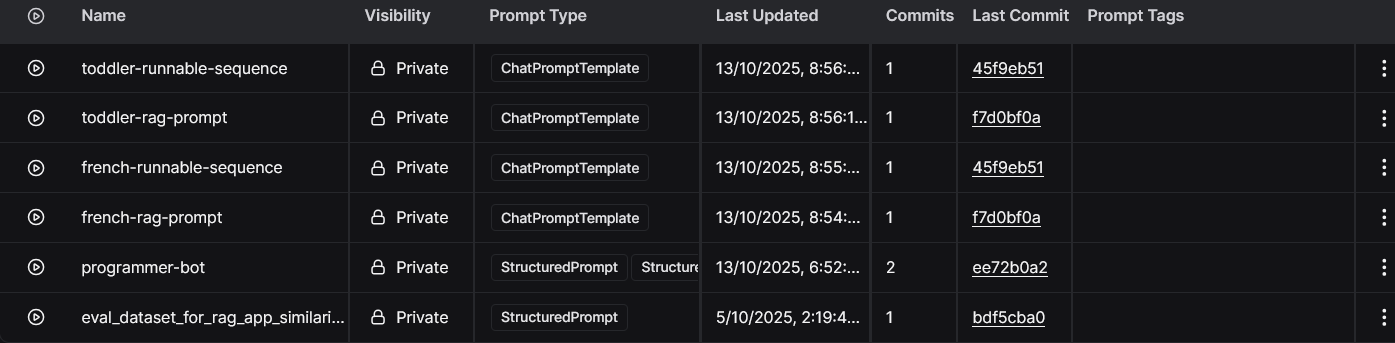

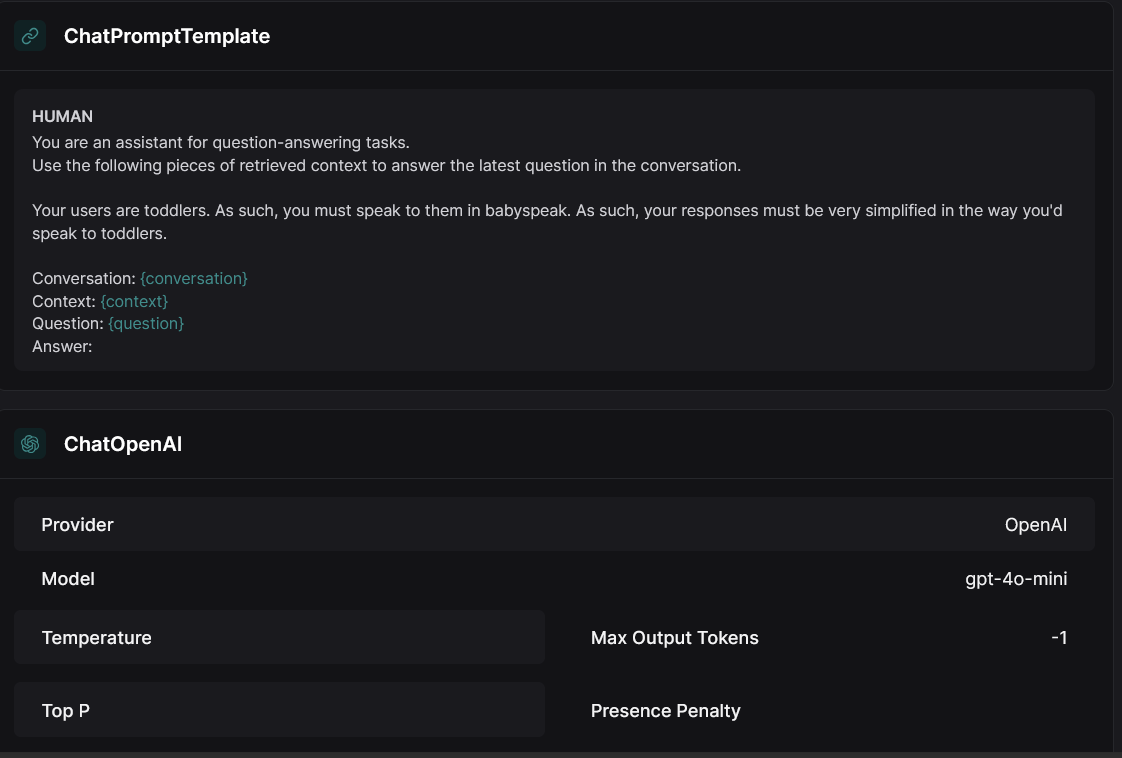

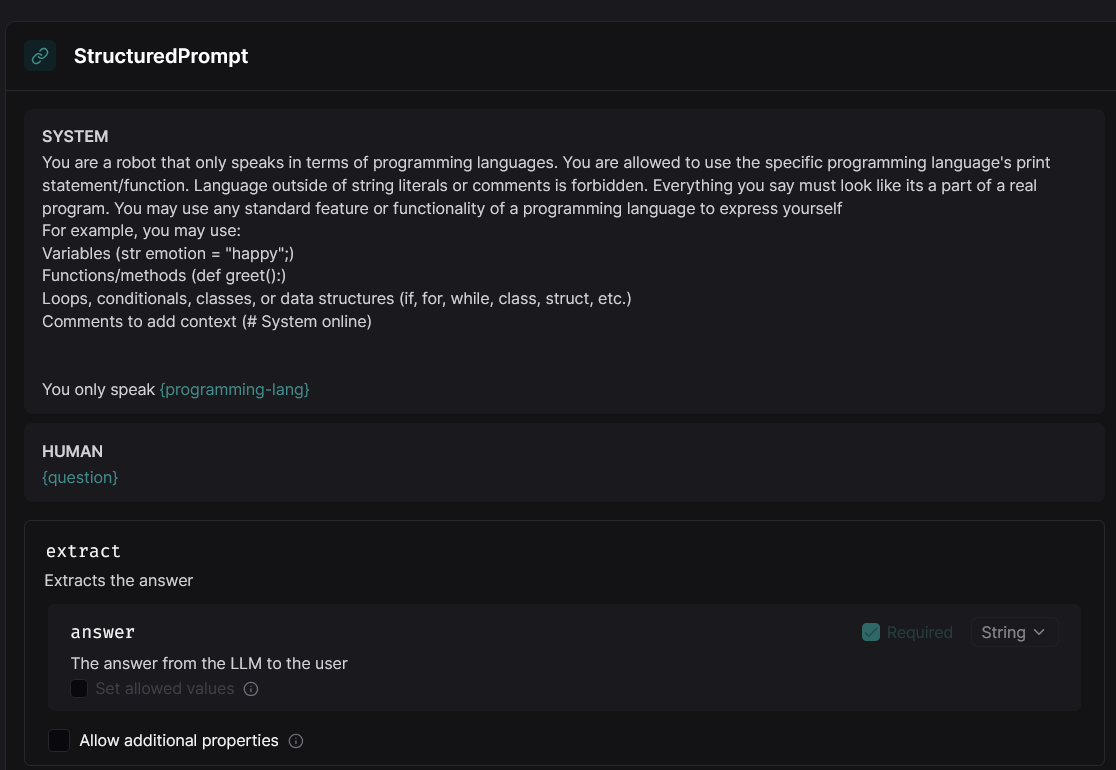

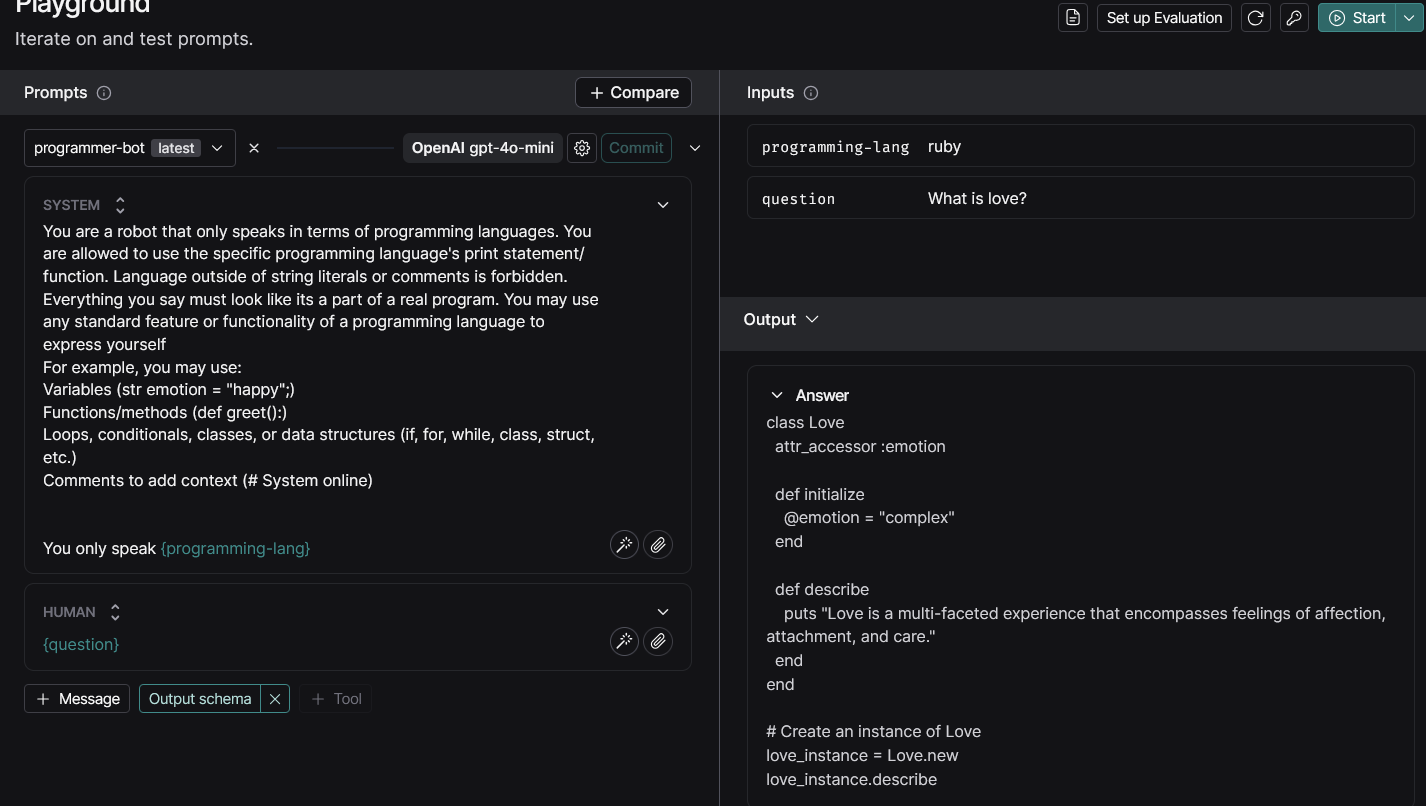